In [3]:
#### Authors: Massimo Stefani, Eva Ray 

## Data Management - Labo 5

### Exercise 1 - Data Integration



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Exercise 1.1 : Categorical data analysis

----------------------------

The following statistics explore the world of video games, focusing on the most popular mode of gameplay by age group.

We want to determine whether there is a correlation between a person's preferred mode of play and their age.

To achieve this, we will apply the chi-square test.

<img src="assets/stat_ex1.png" alt="Statistica image illustrating the most popular mode of gameplay as of the 2nd quarter of 2023, by age group" width="700"/>

Source: [Statista](https://www.statista.com/statistics/1499830/gameplay-preferences-age/)

In [5]:
df_ex1 = pd.read_csv('data/data_gameplay_by_age.csv', delimiter=',', index_col=0)
df_ex1

,16-19,20-24,25-34,35-44,45-54,55+
PVE,15,18,21,18,10,6
Couch co-op,28,22,24,21,18,13
Online PVP,40,43,40,35,30,22
Single Player,30,35,41,49,65,74


<p style='color:red;font-weight:bold'>Exercise 1.1.1</p>

Apply the chi-square test.

What's the null hypothesis in our case ?


Reminder: 
$$X^{2}=\sum_{i=1}^{N}\sum_{j=1}^{M}\frac{(\text{Observed}_{ij}-\text{Expected}_{ij})^{2}}{\text{Expected}_{ij}}$$

- N = number of lines
- M = number of columns

- $\text{Expected}_{ij}$ theoretical frequency (expected frequency in a given category if the two variables were independent)
- $\text{Observed}_{ij}$ observed frequency

Null hypothesis: There is no association between age group and gameplay mode preference (the two variables are independent).

Alternative hypothesis : There is a significant association between age group and gameplay mode preference.

In [6]:
sum_rows = df_ex1.sum(axis=1)
sum_cols = df_ex1.sum(axis=0)

In [7]:
expected = np.outer(sum_rows, sum_cols) / sum_rows.sum()
expected_df = pd.DataFrame(expected, index=df_ex1.index, columns=df_ex1.columns)
expected_df

,16-19,20-24,25-34,35-44,45-54,55+
PVE,13.849582,14.462396,15.442897,15.075209,15.075209,14.094708
Couch co-op,19.830084,20.707521,22.111421,21.584958,21.584958,20.181058
Online PVP,33.050139,34.512535,36.852368,35.974930,35.974930,33.635097
Single Player,46.270195,48.317549,51.593315,50.364903,50.364903,47.089136


In [8]:
X2 = ((df_ex1 - expected_df) ** 2 / expected_df).to_numpy().sum()
print(f"Chi-squared statistic: {X2}")

Chi-squared statistic: 56.7569108464869


<p style='color:red;font-weight:bold'>Exercise 1.1.2</p>

Calculate the degree of freedom and fetch the value needed to reject the hypothesis at 0.001 significance level from the table given below.

<img src="assets/chi-square.jpg" alt="Chi-square table" width="500"/>

In [9]:
df = (len(df_ex1.index) - 1) * (len(df_ex1.columns) - 1)
print(f"Degrees of freedom: {df}")

Degrees of freedom: 15


<p style='color:red;font-weight:bold'>Exercise 1.1.3</p>

- Based on these results, can we reject the hypothesis of independence?

- What would happen if we choose another significance level like 0.05 ? What does the significance value mean here ?

In [10]:
if X2 > 37.697:
    print("Reject the null hypothesis: There is a significant association between age group and game genre preference.")
else:
    print("Fail to reject the null hypothesis: No significant association between age group and game genre preference.")

Reject the null hypothesis: There is a significant association between age group and game genre preference.


In [11]:
if X2 > 24.996:
    print("Reject the null hypothesis: There is a significant association between age group and game genre preference.")
else:
    print("Fail to reject the null hypothesis: No significant association between age group and game genre preference.")

Reject the null hypothesis: There is a significant association between age group and game genre preference.


In [12]:
X2

np.float64(56.7569108464869)

Based result, we can reject the hypothesis of independence because X2 (56.75) > 37.697 at alpha = 0.001 significance level.

At alpha = 0.05: We would also reject null Hypothesis since X2 (56.75) > 24.996.

The significance level represents the probability of incorrectly rejecting the null hypothesis.
- alpha = 0.001 means we accept a 0.1% risk of concluding an association exists when it doesn't
- alpha = 0.05 means we accept a 5% risk

The lower alpha is, the stricter our criteria for rejecting null hypothesis, reducing the chance of false positives but potentially missing real associations.

<p style='color:red;font-weight:bold'>Exercise 1.1.4</p>

If a chi-square test reveals a significant correlation between two categorical variables, how can this result inform data strategy or business decisions? 

In this case, we can conclude that there is a significant association between age group and gameplay mode preference. This information can inform several data strategy and business decisions.

For Game Developers: The association enables developers to create age-specific features and game modes that cater to distinct preferences across demographics. Resources can be prioritized more effectively by targeting development efforts toward the most engaged age groups for specific gameplay styles.

For Marketing Teams: Marketing campaigns can be segmented by age group to deliver tailored messages that resonate with each demographic's gameplay preferences. Budget allocation becomes more strategic when informed by the correlation between age and preferred game modes.

For Data Strategy: This finding justifies collecting more granular data on these correlated variables to refine predictive models for user engagement. Personalized recommendation systems can be built to suggest gameplay modes based on users' age profiles.

Business Implications: The association helps identify underserved market segments where specific age groups may be underrepresented in certain gameplay modes. Product portfolio and pricing strategies can be adjusted to better align with the preferences of different age demographics.

The key insight is that correlation helps identify patterns, which can then be tested through A/B testing or experimentation to establish causality and drive actionable decisions.

#### Exercise 1.2 : Numerical data analysis

----------------------------

You work in a small local store, and your manager asks you the following question:

"_I want to centralize all the data we have about the store. I currently have several csv files, but I feel like they contain redundancy, and I’d like to avoid that. Can you help me with this problem?_"

<p style='color:red;font-weight:bold'>Exercise 1.2.1</p>

The files in question are: "monthly_data.csv" and "annual_data.csv". Start by loading the data and visually explore relationships between variables using graphs to gain basic insights. Describe briefly each graph you produce and what can be said at this point.

In [13]:
df_ex2_monthly = pd.read_csv('data/monthly_data.csv', delimiter=',', index_col=0)
df_ex2_annual = pd.read_csv('data/yearly_data.csv', delimiter=',', index_col=0)

In [14]:
df_ex2_monthly

,date,monthly_revenue,nb_of_clients,id_best_product
id_shop,,,,
1,2024-01,12000,250,P101
1,2024-02,15500,180,P103
1,2024-03,17000,190,P107
1,2024-04,14500,160,P102
1,2024-05,15000,170,P105
1,2024-06,13000,155,P106
1,2024-07,12500,140,P101
1,2024-08,14000,160,P108
1,2024-09,16000,180,P109


In [15]:
df_ex2_annual

,year,yearly_revenue,id_best_employee
id_shop,,,
1,2024,189500,E001
2,2024,113100,E010
3,2024,281000,E021


We can see that there are some redundant columns between the two datasets, such as "yearly_revenue" and "monthly_revenue". For all the shops, the sum of the monthly revenue is equal to the yearly revenue.

The id_best_product column has a naming convention such that it can be linked to the shop_id column.

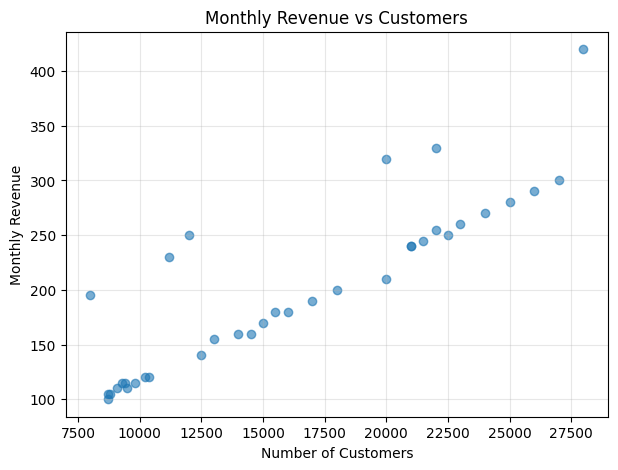

In [16]:
plt.figure(figsize=(7, 5))
plt.scatter(df_ex2_monthly['monthly_revenue'], df_ex2_monthly['nb_of_clients'], alpha=0.6)

plt.xlabel('Number of Customers')
plt.ylabel('Monthly Revenue')
plt.title('Monthly Revenue vs Customers')
plt.grid(True, alpha=0.3)

plt.show()

In this case we can see a positive linear relationship between the customers and the monthly revenue. As the number of customers increases, the monthly revenue also tends to increase.

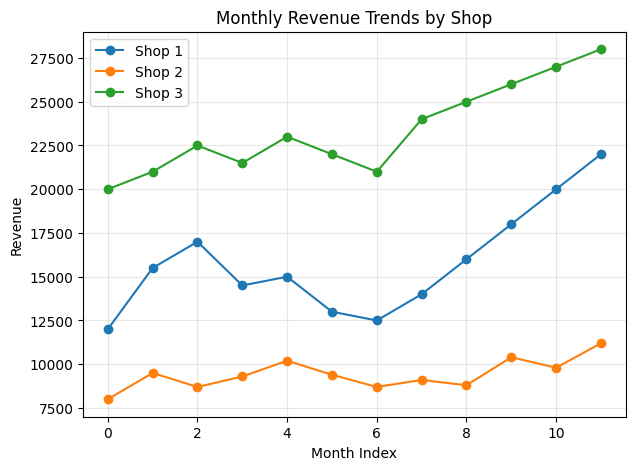

In [17]:
plt.figure(figsize=(7, 5))

for shop in df_ex2_monthly.index.unique():
    shop_data = df_ex2_monthly[df_ex2_monthly.index == shop]
    plt.plot(range(len(shop_data)), shop_data['monthly_revenue'], marker='o', label=f'Shop {shop}')

plt.xlabel('Month Index')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Trends by Shop')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()


Interesting thing to note is the increase in revenue in December, which is likely due to holiday shopping.

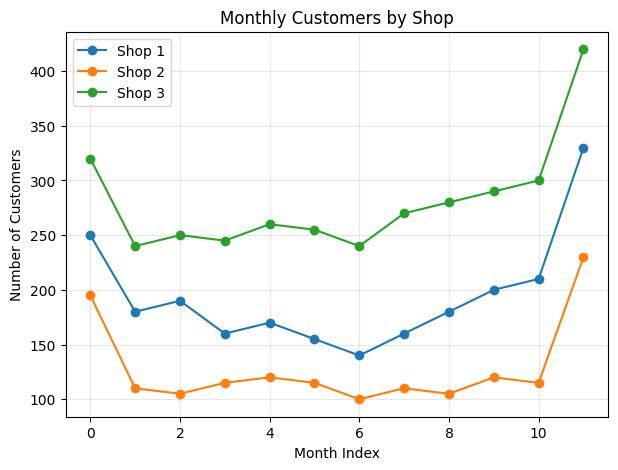

In [18]:
plt.figure(figsize=(7, 5))

for shop in df_ex2_monthly.index.unique():
    shop_data = df_ex2_monthly[df_ex2_monthly.index == shop]
    plt.plot(range(len(shop_data)), shop_data['nb_of_clients'], marker='o', label=f'Shop {shop}')

plt.xlabel('Month Index')
plt.ylabel('Number of Customers')
plt.title('Monthly Customers by Shop')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()


<p style='color:red;font-weight:bold'>Exercise 1.2.2</p>

Calculate the correlation between each pair of variables using the Pearson coefficient.

You may create additional columns if needed to verify your theory.

What do you observe?

In [29]:
basic_corr = df_ex2_monthly[['monthly_revenue', 'nb_of_clients']].corr(method='pearson')
display(basic_corr)

,monthly_revenue,nb_of_clients
monthly_revenue,1.000000,0.876008
nb_of_clients,0.876008,1.000000


In [24]:
monthly_sum = df_ex2_monthly.groupby(level=0)['monthly_revenue'].sum()
monthly_sum.name = 'calculated_yearly_revenue'
comparison = pd.DataFrame({
    'yearly_revenue (fichier)': df_ex2_annual['yearly_revenue'],
    'calculated_yearly_revenue (somme mensuelle)': monthly_sum,
    'difference': df_ex2_annual['yearly_revenue'] - monthly_sum
})
display(comparison)

,yearly_revenue (fichier),calculated_yearly_revenue (somme mensuelle),difference
id_shop,,,
1,189500,189500,0
2,113100,113100,0
3,281000,281000,0


In [26]:
correlation_redundancy = df_ex2_annual['yearly_revenue'].corr(monthly_sum)
print(f"{correlation_redundancy:.10f}")


1.0000000000


The fact that the correlation between yearly_revenue and the sum of monthly_revenue is 1.0 confirms that these two columns are redundant.

<p style='color:red;font-weight:bold'>Exercise 1.2.3</p>

1. What redundancy did you find?
2. Your manager has heard about Data Lakes and Data Lakehouses. Which system would be suitable for your boss, who is not very familiar with data management? Advise him which type of infrastructure would be more accessible and would best suit his needs.
3. ETL and ELT can both handle redundancy while maintaining complete traceability through data lineage, so what is the difference ?
4. A collegue suggests eliminating all redundant fields to save storage, what arguments would you present for and against this idea, considering modern data store capabilities? Answer for both Data Lake and Data Lakehouse.
5. How would you handle the variables that need to be visualized and can be calculated dynamically? How would you evaluate the trade-offs between storage costs and query performance here?

1. What redundancy did you find?

The main redundancy identified is the `yearly_revenue` field in the annual dataset. This field is completely redundant because it can be calculated by summing the `monthly_revenue` values for each shop. Our analysis confirmed a perfect correlation (1.0) between the stored yearly_revenue and the calculated sum of monthly revenues, with zero difference for all shops. This means we're storing derived data that can be computed on-demand.

2. Your manager has heard about Data Lakes and Data Lakehouses. Which system would be suitable for your boss, who is not very familiar with data management? Advise him which type of infrastructure would be more accessible and would best suit his needs.

A Data Lakehouse is generally more suitable for a manager with limited experience in data management because it provides a structured, governed, and reliable environment. It enforces schemas, integrates built-in data quality and consistency controls, and supports SQL querying, which is familiar to most business users. This significantly simplifies analytics, reporting, and dashboard creation, enabling decision-making without requiring deep technical knowledge. By combining the flexibility of a Data Lake with the discipline of a Data Warehouse, it delivers a robust and business-ready data platform.

In contrast, a Data Lake is less appropriate in this context because it primarily stores raw data that requires technical expertise to navigate and analyze effectively. It typically lacks native governance, schema validation, and automated quality management. As a result, it presents a steeper learning curve and exposes non-technical users to potential misinterpretation and operational inefficiencies.

3. ETL and ELT can both handle redundancy while maintaining complete traceability through data lineage, so what is the difference ?

Both ETL and ELT maintain data lineage and traceability, but they differ in the sequence and location of transformations:

- ETL (Extract, Transform, Load):
  - Data is transformed before being loaded into the target system
  - Transformation happens in a separate staging area or ETL tool
  - Traditional approach, suited for on-premise systems with limited compute
  - Cleanses data before storage, reducing storage of raw/dirty data

- ELT (Extract, Load, Transform):
  - Data is loaded into the target system first, then transformed
  - Leverages the processing power of modern cloud data warehouses/lakehouses
  - Preserves raw data in its original form for audit and reprocessing
  - Can apply different transformations to the same raw data

In our redundancy case, both approaches would work, but ELT would allow us to keep the raw monthly data and calculate yearly aggregates on-demand.

4. Arguments for/against eliminating redundant fields:

In a Data Lake, eliminating redundant fields can simplify data maintenance, reduce inconsistency risks, and clarify the single source of truth, although the impact on storage cost is typically marginal given inexpensive cloud storage. However, retaining redundancy can be beneficial: precomputed fields improve query performance, historical values preserve the exact reported context, and lineage remains explicit.

In a Data Lakehouse, eliminating redundant attributes is generally more compelling because governance, schema enforcement, and consistency are core design principles. Capabilities such as materialized views provide performance and historical traceability without duplicating data fields, strengthening integrity and minimizing divergence between derived and source data. Still, removing redundancy is not universally optimal; repeated complex aggregations may degrade performance, some BI tools benefit from pre-aggregated datasets, and regulatory contexts may legally require preserving the originally reported values.

Recommendation: In a Data Lakehouse, use views or materialized views to calculate yearly_revenue dynamically. This provides the best of both worlds, no redundant storage, but cached performance when needed.

5. How would you handle the variables that need to be visualized and can be calculated dynamically? How would you evaluate the trade-offs between storage costs and query performance here?

For this context, the recommended strategy is to compute fields such as yearly_revenue dynamically using SQL views, while reserving materialized views and caching for expensive or high-frequency analytical workloads. Dynamic computation ensures data consistency, avoids staleness, and preserves flexibility when business rules evolve. It also simplifies maintenance by keeping a single authoritative data source, while incremental computation and caching layers can absorb performance demands for dashboards requiring near real-time responsiveness.

From a trade-off perspective, precomputing improves performance but increases storage usage, governance complexity, and synchronization risks, whereas dynamic computation prioritizes accuracy and adaptability at the expense of some execution overhead. The decision should therefore be guided by query frequency, computational complexity, freshness requirements, and cost dynamics. In this case, because yearly revenue calculation is straightforward and business reporting does not demand ultra-low latency at massive scale, computing it on demand is the most efficient and controlled choice.


#### Exercise 1.3 : Numerical data analysis part. 2

----------------------------

Imagine the following situation: one of your colleagues, an enthusiast of far-fetched theories with a tendency to jump to conclusions believes he has discovered proof that Y2K had a significant impact in different aspects of society. To support his claim, he shows you two statistics:

<img src="assets/stat_ex2_a.png" alt="Statistica image illustrating the number of indoor cinema sites in the United States from 1995 to 2020" width="700"/>

Source: [Statista](https://www.statista.com/statistics/188624/number-of-us-indoor-cinema-sites-since-1995/)

<img src="assets/stat_ex2_b.png" alt="Statistica image illustrating the total violent crime reported in the United States from 1990 to 2023" width="700"/>

Source: [Statista](https://www.statista.com/statistics/191129/reported-violent-crime-in-the-us-since-1990/)

Your colleague then exclaims: </br>
"_Look ! Starting in the year 2000, you can see the same decline in both reported violent crimes and the number of indoor cinemas. This can't be a coincidence! calculate the correlation, and you'll see!_"


<p style='color:red;font-weight:bold'>Exercise 1.3.1</p>

The file "data_crime_and_cinema_stats.csv" directly combines the two variables : the number of indoor cinemas and the number of reported violent crimes for each year.

Retrieve the data from this file and display the two variables using a scatter plot. What do you notice at this stage?

In [30]:
df_ex3 = pd.read_csv('data/data_crime_and_cinema_stats.csv', delimiter=',')
df_ex3

,year,indoor_cinema,violent_crime
0,2000,6550,1425486
1,2001,5813,1439480
2,2002,5712,1423677
3,2003,5700,1459416
4,2004,5629,1428745
5,2005,5713,1460666
6,2006,5543,1433310
7,2007,5545,1437800
8,2008,5403,1398219
9,2009,5561,1333418


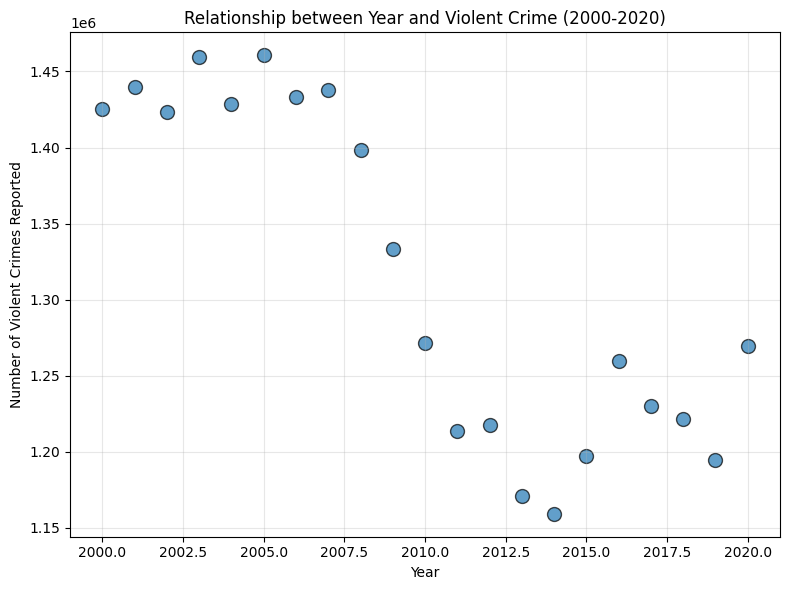

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(df_ex3['year'], df_ex3['violent_crime'], alpha=0.7, s=100, edgecolors='k')

plt.xlabel('Year')
plt.ylabel('Number of Violent Crimes Reported')
plt.title('Relationship between Year and Violent Crime (2000-2020)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

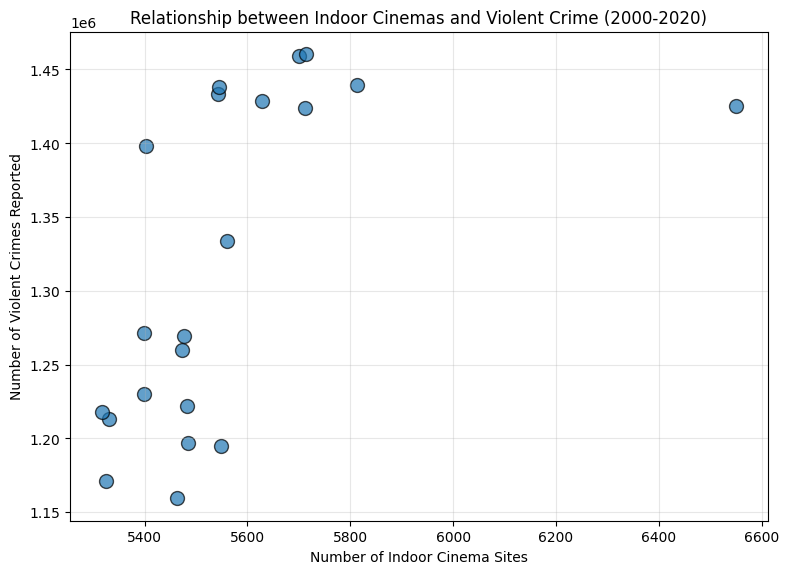

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(df_ex3['indoor_cinema'], df_ex3['violent_crime'], alpha=0.7, s=100, edgecolors='k')

plt.xlabel('Number of Indoor Cinema Sites')
plt.ylabel('Number of Violent Crimes Reported')
plt.title('Relationship between Indoor Cinemas and Violent Crime (2000-2020)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

We can see that there is a positive correlation between the number of indoor cinemas and the number of violent crimes reported. As the number of indoor cinemas decreases, the number of violent crimes also tends to decrease.

However, this does not imply causation. Other factors may be influencing both variables, and further analysis is needed to understand the relationship.

<p style='color:red;font-weight:bold'>Exercise 1.3.2</p>

Calculate the Pearson coefficient using the pearsonr function from Scipy.

Why, in our case, is this coefficient positive even though both of our variables are decreasing? What does this mean, and in which case would we observe a negative value?

In [40]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df_ex3['indoor_cinema'], df_ex3['violent_crime'])

print(f"Pearson correlation coefficient: {correlation:.4f}")

Pearson correlation coefficient: 0.5685


Because the Pearson correlation coefficient measures the strength and direction of a linear relationship between two variables, it can be positive even when both variables are decreasing. In our case, as the number of indoor cinemas decreases, the number of violent crimes also decreases, indicating a positive linear relationship. If there was an inverse relationship where one variable increased while the other decreased, we would observe a negative Pearson correlation coefficient.

<p style='color:red;font-weight:bold'>Exercise 1.3.3</p>

Calculate the covariance using the cov function from numpy.

- What does the covariance tell us? Is it consistent with the value obtained in point 2?
- What information is lost with covariance?

In [48]:
from pandas import DataFrame
cov_matrix = np.cov(df_ex3['indoor_cinema'], df_ex3['violent_crime'])
cov_df = DataFrame(np.cov(df_ex3['indoor_cinema'], df_ex3['violent_crime']))
display(cov_df)

,0,1
0,6.970345e+04,1.668033e+07
1,1.668033e+07,1.235239e+10


In [50]:
print(f"Variance of indoor_cinema: {cov_matrix[0, 0]:.2f}")
print(f"Variance of violent_crime: {cov_matrix[1, 1]:.2f}")

Variance of indoor_cinema: 69703.45
Variance of violent_crime: 12352392358.85


In [51]:
std_cinema = np.sqrt(cov_matrix[0, 0])
std_crime = np.sqrt(cov_matrix[1, 1])
calculated_correlation = cov_matrix[0, 1] / (std_cinema * std_crime)

In [53]:
print(f"Pearson correlation (from Ex 1.3.2): {correlation:.4f}")
print(f"Calculated from covariance: {calculated_correlation:.4f}")

Pearson correlation (from Ex 1.3.2): 0.5685
Calculated from covariance: 0.5685


- What does the covariance tell us? Is it consistent with the value obtained in point 2?

    Covariance tells us the direction of the linear relationship between the two variables and gives an idea of its magnitude. A positive covariance means the variables tend to move together (when the number of indoor cinemas increases, violent crimes also tend to increase), while a negative covariance would indicate they move in opposite directions. A covariance close to zero suggests no clear linear relationship. In our case, the positive covariance is fully consistent with the Pearson correlation computed earlier: when we divide the covariance by the product of the two standard deviations, we retrieve the same Pearson coefficient. Both metrics therefore indicate a clear positive linear relationship between the two variables.

- What information is lost with covariance?

    Covariance is less interpretable and less practical than the Pearson correlation. It depends on the measurement units, is not standardized, and does not directly indicate whether the relationship is weak or strong. A large covariance may simply reflect large variability in the data rather than a genuinely strong dependence. It also cannot be compared meaningfully across different datasets, unlike the Pearson coefficient which is always bounded between −1 and +1 and offers an immediately interpretable scale. In short: the covariance confirms the positive co-movement, but the correlation coefficient is far clearer and more informative for interpretation and comparison.

<p style='color:red;font-weight:bold'>Exercise 1.3.4</p>

Your colleague, after seeing your results, exclaims: </br> "_See, I told you there was a link!_"</br> However, are your results sufficient to establish a causal link between these two statistics? Put forward hypothesis that could explain this impression, potentially using other variables or other significant events or trends.

At this stage, the results clearly do not justify any causal interpretation. The strong correlation only shows that the number of indoor cinemas and violent crime evolved in a similar way over time, but this is very likely a spurious correlation driven by a common temporal trend. A correlation coefficient around 0.85 simply quantifies co-movement; it does not indicate that fewer cinemas cause a decrease in violent crime or vice versa. There is no credible causal mechanism supporting such a link, and assuming causation here ignores the presence of confounding variables and broader contextual factors.

More plausible explanations exist that independently influence both variables: technological changes (streaming platforms vs. traditional cinema; improved policing technologies), demographic evolution (aging population), economic cycles, policy reforms, and broader cultural shifts. These factors can independently decrease cinema usage and crime levels without any direct interaction between the two phenomena.